In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
imagen = np.random.randint(0,256,(80,40), dtype=np.uint8)
print("dimensiones:", imagen.shape)


dimensiones: (80, 40)


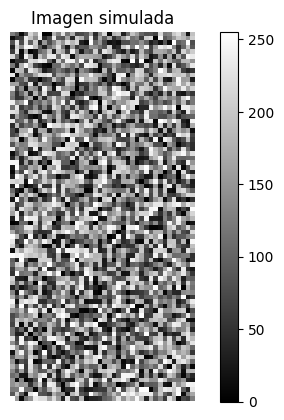

In [ ]:
plt.imshow(imagen,cmap='gray')
plt.title('Imagen simulada')
plt.colorbar()
plt.axis('off')
plt.show()

In [ ]:
img = cv2.imread('foto2.jpg')
print(img.shape)

(980, 980, 3)


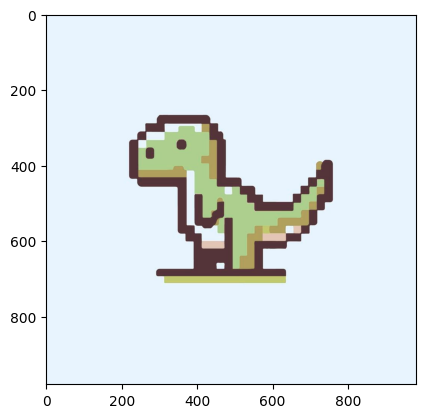

In [ ]:
plt.imshow(img)

In [ ]:
img_gray = cv2.imread('foto2.jpg', cv2.IMREAD_GRAYSCALE)

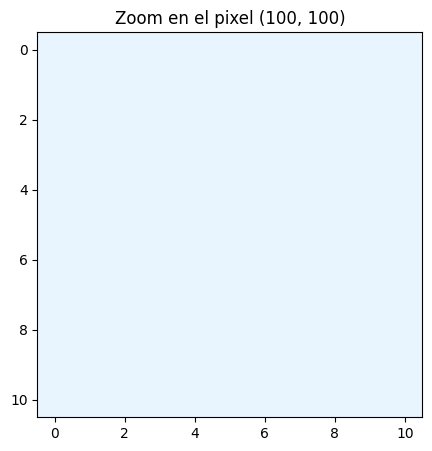

In [ ]:
fila_pixel = 100
columna_pixel = 100

tamano_zoom = 5

# Calcula los límites de la región
fila_inicio = max(0, fila_pixel - tamano_zoom)
fila_fin = min(img.shape[0], fila_pixel + tamano_zoom + 1)
columna_inicio = max(0, columna_pixel - tamano_zoom)
columna_fin = min(img.shape[1], columna_pixel + tamano_zoom + 1)

# Extrae la región de la imagen
region_zoom = img[fila_inicio:fila_fin, columna_inicio:columna_fin]

# Muestra la región con interpolación 'nearest' para ver los píxeles individuales
plt.figure(figsize=(5, 5)) # Ajusta el tamaño de la figura si es necesario
plt.imshow(region_zoom, interpolation='nearest')
plt.title(f'Zoom en el pixel ({fila_pixel}, {columna_pixel})')
plt.axis('on') # Muestra los ejes para ver las coordenadas relativas en el zoom
plt.show()

In [ ]:
print('Color RGB del pixel 100x100',img[100,100])

[232 244 254]


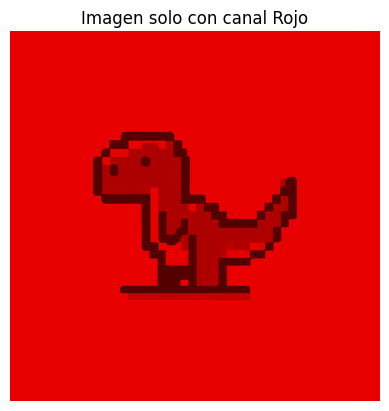

In [ ]:
img_red = img.copy()
img_red[:, :, 1] = 0 # Set green channel to 0
img_red[:, :, 2] = 0 # Set blue channel to 0

plt.imshow(img_red)
plt.title('Imagen solo con canal Rojo')
plt.axis('off')
plt.show()

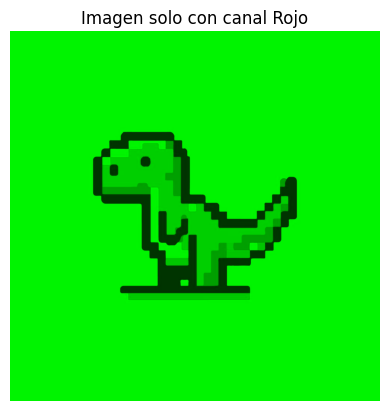

In [ ]:
img_red = img.copy()
img_red[:, :, 0] = 0 # Set green channel to 0
img_red[:, :, 2] = 0 # Set blue channel to 0

plt.imshow(img_red)
plt.title('Imagen solo con canal Verde')
plt.axis('off')
plt.show()

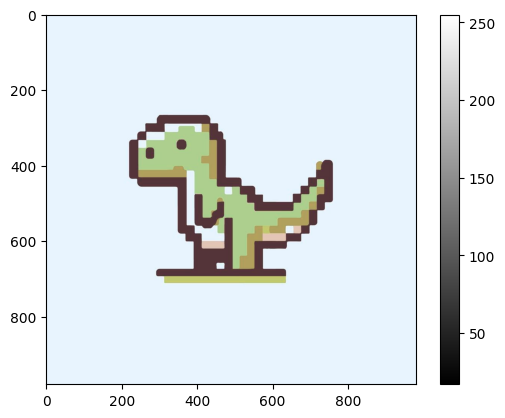

In [ ]:
plt.imshow(img, cmap='gray')
plt.colorbar()

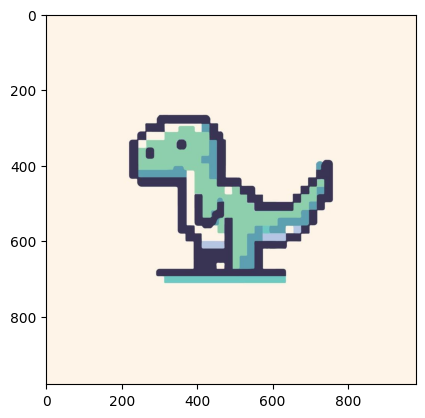

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [ ]:
class Imagen:
  def __init__(self, matriz):
    self.matriz = matriz
    self.alto, self.ancho = matriz.shape[:2]

  def obtener_pixel(self, x, y):
    return self.matriz[y,x]

  def modificar_pixel(self, x,y,valor):
    self.matriz[y,x]=valor

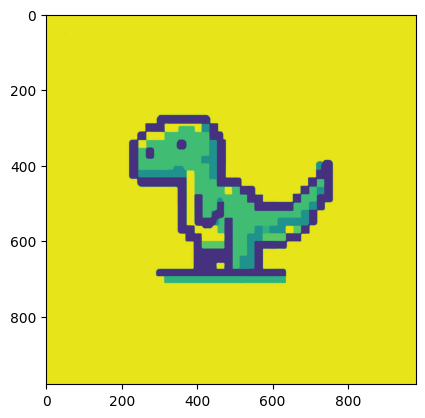

In [ ]:
img = cv2.imread('foto2.jpg',cv2.IMREAD_GRAYSCALE)
imagen=Imagen(img)
imagen.modificar_pixel(50,50,128)
imagen

plt.imshow(imagen.matriz)

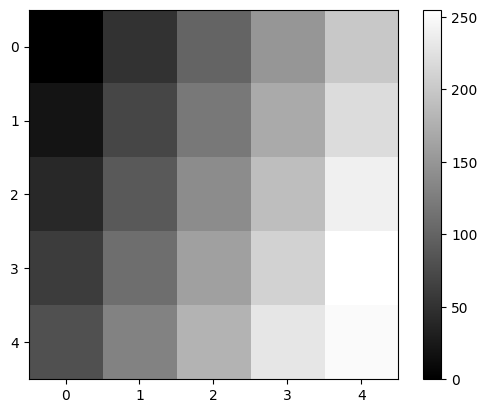

In [ ]:
matriz = np.array(
    [[0,50,100,150,200],
    [20,70,120,170,220],
    [40,90,140,190,240],
    [60,110,160,210,255],
    [80,130,180,230,250]],
    dtype=np.uint8
)

plt.imshow(matriz, cmap='gray')
plt.colorbar()

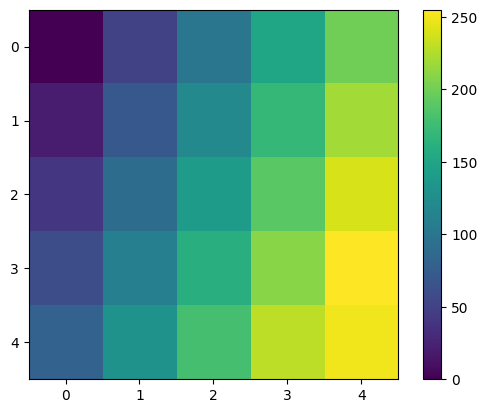

In [ ]:
plt.imshow(matriz)
plt.colorbar()

In [ ]:
matriz_incompleta = np.array([
    [-1,50,-1,150,-1],
    [20,-1,120,-1,220],
    [-1, 90, -1, 190, -1],
    [60,-1,160,-1,255],
    [-1,130,-1,230,-1],
], dtype=np.int16)

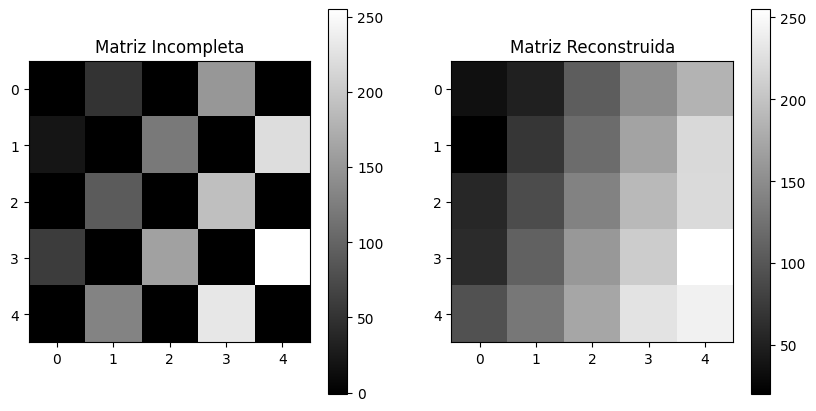

In [ ]:
def reconstruir(m):
    m_rec = m.copy()
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            if m_rec[i, j] == -1:
                # Simple interpolation from neighbors
                neighbors = []
                if i > 0 and m_rec[i-1, j] != -1:
                    neighbors.append(m_rec[i-1, j])
                if i < m_rec.shape[0] - 1 and m_rec[i+1, j] != -1:
                    neighbors.append(m_rec[i+1, j])
                if j > 0 and m_rec[i, j-1] != -1:
                    neighbors.append(m_rec[i, j-1])
                if j < m_rec.shape[1] - 1 and m_rec[i, j+1] != -1:
                    neighbors.append(m_rec[i, j+1])

                if neighbors:
                    m_rec[i, j] = int(np.mean(neighbors))
                else:
                    # If no valid neighbors, leave as -1 or set to a default
                    pass # Or m_rec[i, j] = 0

    return m_rec

matriz_reconstruida = reconstruir(matriz_incompleta)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(matriz_incompleta, cmap='gray')
plt.title('Matriz Incompleta')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(matriz_reconstruida, cmap='gray')
plt.title('Matriz Reconstruida')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(matriz_reconstruida, cmap='gray')
plt.title('Matriz Reconstruida')
plt.colorbar()



plt.show()

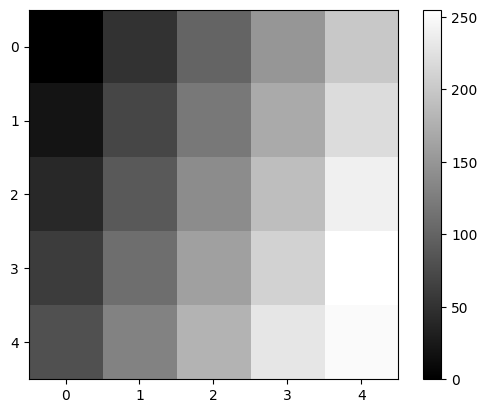

In [ ]:
matriz = np.array(
    [[0,50,100,150,200],
    [20,70,120,170,220],
    [40,90,140,190,240],
    [60,110,160,210,255],
    [80,130,180,230,250]],
    dtype=np.uint8
)

plt.imshow(matriz, cmap='gray')
plt.colorbar()